# Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pycaret.regression import *

In [2]:
EU_milk = pd.read_pickle('data/eu.pickle')
US_milk = pd.read_pickle('data/us.pickle')
china_milk = pd.read_pickle('data/cn.pickle')
fred_series = pd.read_pickle('data/fred.pickle')

# All data

In [3]:
# Commodities and indicators
fred_list = ['MCOILBRENTEU', 'MCOILWTICO', 'MHHNGSP', 'PBARLUSDM', 'PMAIZMTUSDM', 'PNGASEUUSDM', 'PSOYBUSDM', 'PWHEAMTUSDM', 'IPG32411S', 'A33DNO','PCEC96']
models = ['et']

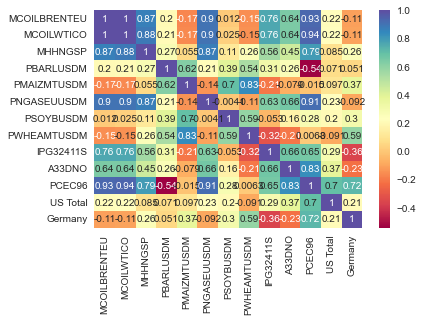

In [4]:
import seaborn as sns

china_milk.name = 'China'
data_all = EU_milk.join(US_milk).join(fred_series).join(china_milk)
dataplot = sns.heatmap(data_all.loc['1992-01-01':'2005-12-31',fred_list + ['US Total','Germany']].corr(), cmap="Spectral", annot=True, annot_kws={'fontsize':10})
plt.savefig('all_fred_corr9205.jpg')

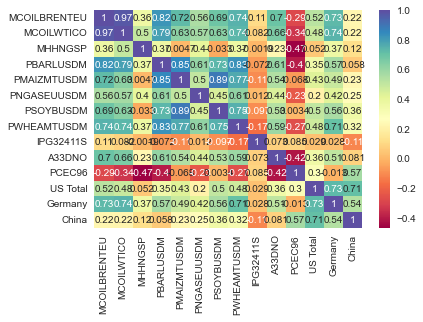

In [5]:
dataplot = sns.heatmap(data_all.loc['2006-01-01':,fred_list + ['US Total','Germany','China']].corr(), cmap="Spectral", annot=True, annot_kws={'fontsize':10})
plt.savefig('all_fred_corr0522.jpg')

# US

## Exploratory Data Analysis

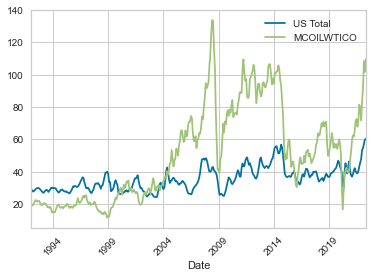

In [6]:
data = US_milk.join(fred_series)
data.loc['1992-01-01':,['US Total', 'MCOILWTICO']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('US_WTI_prices.jpg')
plt.show()

In [7]:
# 10 biggest US states milk producers
US_states = ['California', 'Wisconsin', 'Idaho', 'Texas', 'New York', 'Michigan', 'Minnesota', 'Pennsylvania', 'New Mexico', 'Washington', 'US Total']

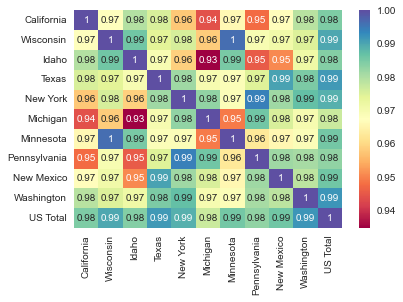

In [8]:

dataplot = sns.heatmap(data[US_states].corr(), cmap="Spectral", annot=True)
plt.savefig('US_states_corr.jpg')

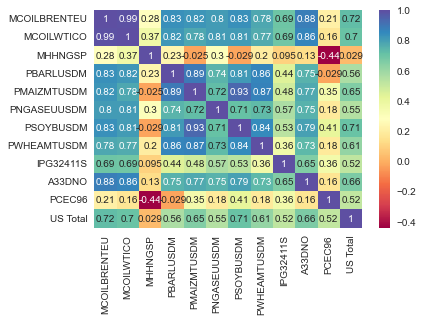

In [9]:
dataplot = sns.heatmap(data[fred_list + ['US Total']].corr(), cmap="Spectral", annot=True)
plt.savefig('US_fred_corr.jpg')

## Regressions
We selected only 5 variables to use for all regression models.
They are:  
* Henry Hub Natural Gas Spot Price (MHHNGSP)
* Global price of Soybeans (PSOYBUSDM)
* Industrial Production: Manufacturing: Non-Durable Goods: Petroleum Refineries (IPG32411S)
* Manufacturers' New Orders: Mining, Oil, and Gas Field Machinery Manufacturing (A33DNO)
* Real Personal Consumption Expenditures (PCEC96)

## Regression from 1992 to 2005

In [10]:
limits = ['1992-01-01','2005-12-31']
indicators = ['MHHNGSP', 'PSOYBUSDM', 'IPG32411S', 'A33DNO', 'PCEC96']

In [11]:
expr = data.loc[limits[0]:limits[1],indicators + ['US Total']]
s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 1992 to 2005', remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,US Total
2,Target type,Regression
3,Data shape,"(168, 6)"
4,Train data shape,"(117, 6)"
5,Test data shape,"(51, 6)"
6,Numeric features,5
7,Rows with missing values,71.4%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.4907,4.7139,2.1320,0.6226,0.0657,0.0482,0.1280
catboost,CatBoost Regressor,1.6321,5.3732,2.2910,0.5634,0.0710,0.0527,1.6500
rf,Random Forest Regressor,1.7312,5.8864,2.3791,0.5272,0.0731,0.0559,0.1300
gbr,Gradient Boosting Regressor,1.7473,6.4428,2.5041,0.4760,0.0764,0.0560,0.0500
xgboost,Extreme Gradient Boosting,1.7712,6.6307,2.5102,0.4672,0.0778,0.0569,0.1540
ada,AdaBoost Regressor,1.9449,6.5426,2.5456,0.4481,0.0794,0.0641,0.0820
lightgbm,Light Gradient Boosting Machine,2.0773,7.8499,2.7655,0.3628,0.0854,0.0675,0.0560
ridge,Ridge Regression,2.3860,10.1165,3.1434,0.1778,0.0960,0.0767,0.0260
lr,Linear Regression,2.3862,10.1180,3.1437,0.1777,0.0960,0.0767,2.2040
lar,Least Angle Regression,2.3862,10.1180,3.1437,0.1777,0.0960,0.0767,0.0260


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [12]:
plot_model(best, save=True)

'Residuals.png'

In [13]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [14]:
limits = ['2006-01-01','2022-05-31']

expr = data.loc[limits[0]:limits[1],indicators + ['US Total']]
s = setup(expr, target = 'US Total', session_id=123, experiment_name='US milk from 2006 to May 2022',remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,US Total
2,Target type,Regression
3,Data shape,"(197, 6)"
4,Train data shape,"(137, 6)"
5,Test data shape,"(60, 6)"
6,Numeric features,5
7,Rows with missing values,3.0%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.3465,9.8472,3.1082,0.7981,0.0768,0.0601,0.0880
catboost,CatBoost Regressor,2.7586,12.5947,3.5263,0.7448,0.0854,0.0697,1.2260
xgboost,Extreme Gradient Boosting,2.7744,15.0338,3.8107,0.6949,0.0929,0.0700,0.0880
rf,Random Forest Regressor,2.8627,14.9706,3.8435,0.6853,0.0928,0.0729,0.1120
gbr,Gradient Boosting Regressor,2.8747,15.3205,3.8944,0.6783,0.0936,0.0725,0.0360
lightgbm,Light Gradient Boosting Machine,3.2802,17.1842,4.1050,0.6473,0.1009,0.0845,0.0540
ada,AdaBoost Regressor,3.1437,17.1834,4.1205,0.6435,0.0986,0.0795,0.0520
knn,K Neighbors Regressor,3.4887,20.7064,4.4880,0.5765,0.1088,0.0883,0.0260
dt,Decision Tree Regressor,3.3455,21.6443,4.6039,0.5288,0.1121,0.0854,0.0200
en,Elastic Net,4.5049,32.5308,5.6282,0.3295,0.1335,0.1125,0.0340


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

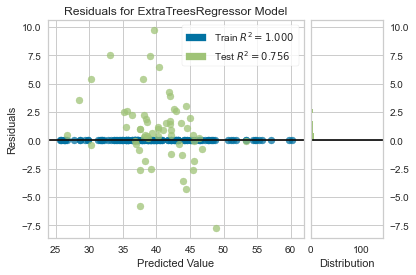

In [15]:
plot_model(best)

In [16]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# EU

## Exploratory Data Analysis

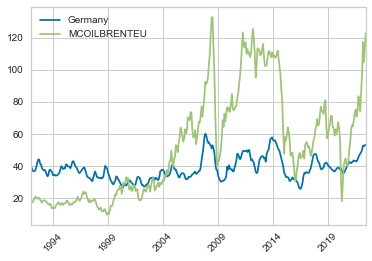

In [17]:
data = EU_milk.join(fred_series)
data.loc['1992-01-01':,['Germany', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('Germany_Brent_prices.jpg')
plt.show()

In [18]:
EU_countries = ['Germany', 'France', 'Netherlands', 'Italy', 'Poland', 'Ireland', 'Spain', 'Denmark', 'Belgium', 'Austria', 'EU(without UK)']

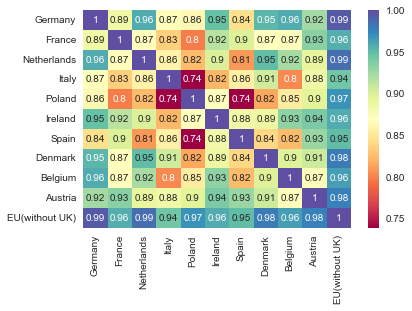

In [19]:
import seaborn as sns
dataplot = sns.heatmap(data[EU_countries].corr(), cmap="Spectral", annot=True)
plt.savefig('EU_states_corr.jpg')

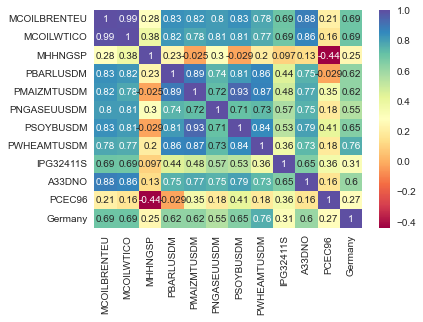

In [20]:
dataplot = sns.heatmap(data[fred_list + ['Germany']].corr(), cmap="Spectral", annot=True)
plt.savefig('Germany_fred_corr.jpg')

## Regression from 1992 to May 2022

In [21]:
limits = ['1992-01-01','2005-12-31']
indicators = ['PNGASEUUSDM', 'PSOYBUSDM', 'IPG32411S', 'A33DNO', 'PCEC96']

In [22]:
expr = data.loc[limits[0]:limits[1],indicators + ['Germany']]
s = setup(expr, target = 'Germany', session_id=123, experiment_name='US milk from 1992 to 2005', remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,Germany
2,Target type,Regression
3,Data shape,"(168, 6)"
4,Train data shape,"(117, 6)"
5,Test data shape,"(51, 6)"
6,Numeric features,5
7,Rows with missing values,71.4%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.5304,3.8970,1.9675,0.7561,0.0547,0.0442,0.0860
catboost,CatBoost Regressor,1.7027,4.6827,2.1591,0.7049,0.0605,0.0496,0.7480
rf,Random Forest Regressor,1.9031,5.7985,2.3917,0.6429,0.0677,0.0557,0.1140
ada,AdaBoost Regressor,2.0410,6.2967,2.4989,0.6080,0.0705,0.0595,0.0600
gbr,Gradient Boosting Regressor,1.9703,6.2205,2.4903,0.6036,0.0702,0.0572,0.0420
xgboost,Extreme Gradient Boosting,1.9854,6.6500,2.5712,0.5862,0.0728,0.0579,0.0420
lightgbm,Light Gradient Boosting Machine,2.1111,6.9621,2.6226,0.5697,0.0742,0.0614,0.0280
ridge,Ridge Regression,2.6463,10.2254,3.1933,0.3581,0.0900,0.0773,0.0200
lr,Linear Regression,2.6472,10.2276,3.1936,0.3580,0.0900,0.0773,0.0300
lar,Least Angle Regression,2.6472,10.2276,3.1936,0.3580,0.0900,0.0773,0.0340


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

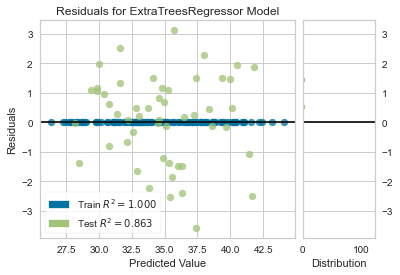

In [23]:
plot_model(best)

In [24]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [25]:
limits = ['2006-01-01','2022-05-31']

expr = data.loc[limits[0]:limits[1],indicators + ['Germany']]
s = setup(expr, target = 'Germany', session_id=123, experiment_name='US milk from 2006 to May 2022',  remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,Germany
2,Target type,Regression
3,Data shape,"(197, 6)"
4,Train data shape,"(137, 6)"
5,Test data shape,"(60, 6)"
6,Numeric features,5
7,Rows with missing values,3.0%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.5095,12.2663,3.4338,0.7936,0.0805,0.0614,1.1240
et,Extra Trees Regressor,2.4787,14.1656,3.6749,0.7656,0.0867,0.0614,0.0880
gbr,Gradient Boosting Regressor,2.7140,15.0047,3.7792,0.7417,0.0906,0.0673,0.0420
ada,AdaBoost Regressor,3.0155,15.9169,3.9235,0.7307,0.0931,0.0747,0.0540
xgboost,Extreme Gradient Boosting,2.7907,15.7987,3.9471,0.7279,0.0934,0.0682,0.0400
lightgbm,Light Gradient Boosting Machine,3.1163,17.4074,4.1532,0.6981,0.0998,0.0775,0.0240
rf,Random Forest Regressor,2.8493,18.9226,4.2295,0.6758,0.1028,0.0724,0.1080
knn,K Neighbors Regressor,3.5000,22.5301,4.5985,0.6307,0.1038,0.0833,0.0280
lasso,Lasso Regression,4.4704,33.9717,5.7420,0.4300,0.1350,0.1100,0.0220
en,Elastic Net,4.4813,34.0415,5.7489,0.4286,0.1350,0.1101,0.0200


{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

In [26]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# China

## Exploratory Data Analysis

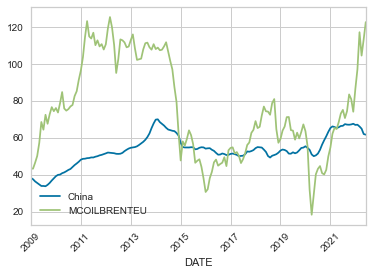

In [27]:
china_milk.name = 'China'
data = fred_series.join(china_milk)
data.loc['2009-01-01':,['China', 'MCOILBRENTEU']].plot()
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.savefig('China_Brent_prices.jpg')
plt.show()

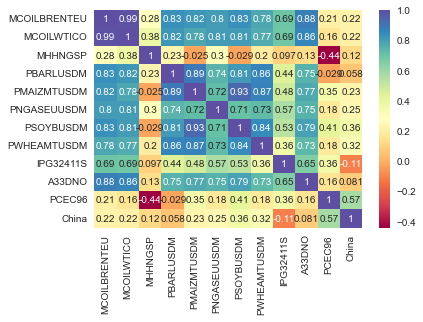

In [28]:
dataplot = sns.heatmap(data[fred_list + ['China']].corr(), cmap="Spectral", annot=True)
plt.savefig('China_fred_corr.jpg')

## Regression from 2009 to 2022

In [29]:
limits = ['2009-01-01','2022-05-31']

expr = data.loc[limits[0]:limits[1],indicators + ['China']]
s = setup(expr, target = 'China', session_id=123, experiment_name='US milk from 2009 to May 2022')
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,China
2,Target type,Regression
3,Data shape,"(161, 6)"
4,Train data shape,"(112, 6)"
5,Test data shape,"(49, 6)"
6,Numeric features,5
7,Rows with missing values,3.7%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.9847,2.4077,1.4253,0.9658,0.0252,0.0182,0.0780
gbr,Gradient Boosting Regressor,1.1069,2.5609,1.5497,0.9590,0.0275,0.0206,0.0380
catboost,CatBoost Regressor,1.2214,3.4577,1.7622,0.9479,0.0341,0.0236,1.0980
xgboost,Extreme Gradient Boosting,1.2357,3.9039,1.8454,0.9436,0.0327,0.0228,0.0340
rf,Random Forest Regressor,1.4478,5.7818,2.1929,0.9200,0.0384,0.0263,0.1080
ada,AdaBoost Regressor,1.6229,5.3510,2.2103,0.9173,0.0404,0.0305,0.0400
lightgbm,Light Gradient Boosting Machine,2.0663,8.0497,2.7879,0.8676,0.0573,0.0416,0.0220
dt,Decision Tree Regressor,1.7911,10.2840,3.1318,0.8322,0.0531,0.0328,0.0220
knn,K Neighbors Regressor,2.2299,11.9421,3.2708,0.8084,0.0609,0.0424,0.0380
lasso,Lasso Regression,3.7594,24.2844,4.8303,0.5784,0.0919,0.0723,0.0200


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [30]:
plot_model(best, save=True)

'Residuals.png'

In [31]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

# Oil

## Regression from 1992 to 2005

In [32]:
limits = ['1992-01-01','2022-05-31']

expr = data.loc[limits[0]:limits[1],indicators + ['MCOILBRENTEU']]
s = setup(expr, target = 'MCOILBRENTEU', session_id=123, experiment_name='Oil from 1992 to 2005',remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,MCOILBRENTEU
2,Target type,Regression
3,Data shape,"(365, 6)"
4,Train data shape,"(255, 6)"
5,Test data shape,"(110, 6)"
6,Numeric features,5
7,Rows with missing values,34.5%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,4.0600,33.3453,5.6976,0.9651,0.1185,0.0943,1.4640
et,Extra Trees Regressor,3.9964,38.9440,5.9958,0.9591,0.1094,0.0856,0.1020
gbr,Gradient Boosting Regressor,4.6387,46.8626,6.6167,0.9510,0.1324,0.1060,0.0580
xgboost,Extreme Gradient Boosting,4.6920,56.9418,7.1188,0.9406,0.1285,0.1018,0.0520
rf,Random Forest Regressor,4.9353,63.7613,7.4295,0.9339,0.1340,0.1054,0.1160
ada,AdaBoost Regressor,5.8329,70.3992,8.1544,0.9256,0.1733,0.1457,0.0740
dt,Decision Tree Regressor,5.5961,72.9443,8.2358,0.9247,0.1551,0.1239,0.0220
lightgbm,Light Gradient Boosting Machine,5.7322,81.9157,8.6340,0.9138,0.1551,0.1249,0.0320
knn,K Neighbors Regressor,6.0758,102.0890,9.5047,0.8949,0.1901,0.1464,0.0280
en,Elastic Net,10.5393,228.9691,14.6199,0.7550,0.2785,0.2471,0.0300


{'loss_function': 'RMSE',
 'border_count': 254,
 'verbose': False,
 'task_type': 'CPU',
 'random_state': 123}

In [33]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'

## Regression from 2006 to May 2022

In [34]:
limits = ['2006-01-01','2022-05-31']

expr = data.loc[limits[0]:limits[1],indicators + ['MCOILBRENTEU']]
s = setup(expr, target = 'MCOILBRENTEU', session_id=123, experiment_name='Oil from 2006 to May 2022',remove_multicollinearity=True, multicollinearity_threshold=0.75)
best = compare_models(fold=5)
best.get_params()

,Description,Value
0,Session id,123
1,Target,MCOILBRENTEU
2,Target type,Regression
3,Data shape,"(197, 6)"
4,Train data shape,"(137, 6)"
5,Test data shape,"(60, 6)"
6,Numeric features,5
7,Rows with missing values,3.0%
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.8944,93.9205,9.3163,0.8670,0.1233,0.0963,0.0960
catboost,CatBoost Regressor,6.9969,92.7712,9.3424,0.8659,0.1234,0.0979,1.1320
rf,Random Forest Regressor,8.4494,120.5326,10.7890,0.8212,0.1453,0.1201,0.1140
xgboost,Extreme Gradient Boosting,8.4503,122.8896,10.9799,0.8149,0.1419,0.1142,0.0440
ada,AdaBoost Regressor,8.5754,125.9469,11.0427,0.8128,0.1510,0.1233,0.0580
gbr,Gradient Boosting Regressor,8.6216,131.0470,11.2942,0.8015,0.1466,0.1190,0.0420
lightgbm,Light Gradient Boosting Machine,8.6724,142.8044,11.5708,0.7941,0.1553,0.1220,0.0400
knn,K Neighbors Regressor,9.2995,174.7167,12.7164,0.7532,0.1683,0.1330,0.0280
en,Elastic Net,11.8925,262.0879,15.8679,0.6169,0.2308,0.1835,0.0320
lasso,Lasso Regression,11.9092,263.0531,15.8926,0.6158,0.2310,0.1838,0.0320


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [35]:
plot_model(best, save=True)

'Residuals.png'

In [36]:
plot_model(best, plot='feature', save=True)

'Feature Importance.png'